# Simulación de Cadena de Markov (Ejemplo de Hoel, Port & Stone)

In [47]:
# Importamos las librerías necesarias
import numpy as np
import random
import pandas as pd
import matplotlib.pyplot as plt

#### Definimos algunas funciones generales para una cadena de Markov finita con probabilidades de transición estacionarias

In [48]:
# Funciones generales para cadena de Markov finita

def stochastic_markov_output(transition_matrix, state):
    decision = random.random()
    decision_row = transition_matrix[state]
    cumulative_dist = list([])
    cumulative_dist.append(float(decision_row[0]))
    next_state = 0

    for i in range(1,decision_row.shape[0]):
        cumulative_dist.append(decision_row[i] + cumulative_dist[i-1])

    for i in range(transition_matrix[0].shape[0]):
        if(decision <= cumulative_dist[i]):
            next_state = i
            break

    return next_state

def chain_simulation(transition_matrix, initial_state, n_iter):

  state=initial_state
  stateHist=list([state])

  for _ in range(n_iter):
    state = stochastic_markov_output(transition_matrix, state)
    stateHist.append(state)

  df = pd.DataFrame(stateHist, columns = ['estado'])
  df.index.name='Pasos'
  
  return df

#### Introducimos la cadena de la página 23 del libro de Hoel (Ejemplo 10)

In [49]:
P = np.array([[1, 0, 0, 0, 0, 0],
              [1/4, 1/2, 1/4, 0, 0, 0],
              [0, 1/5, 2/5, 1/5, 0, 1/5],
              [0, 0, 0, 1/6, 1/3, 1/2],
              [0, 0, 0, 1/2, 0, 1/2],
              [0, 0, 0, 1/4, 0, 3/4]])

#### Simulamos la cadena utilizando distintos estados (100 pasos)

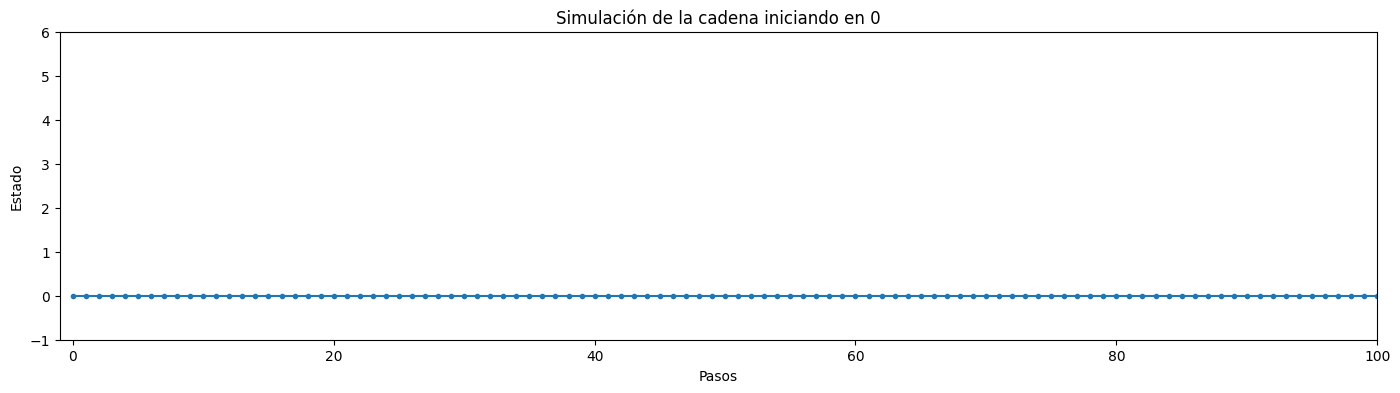

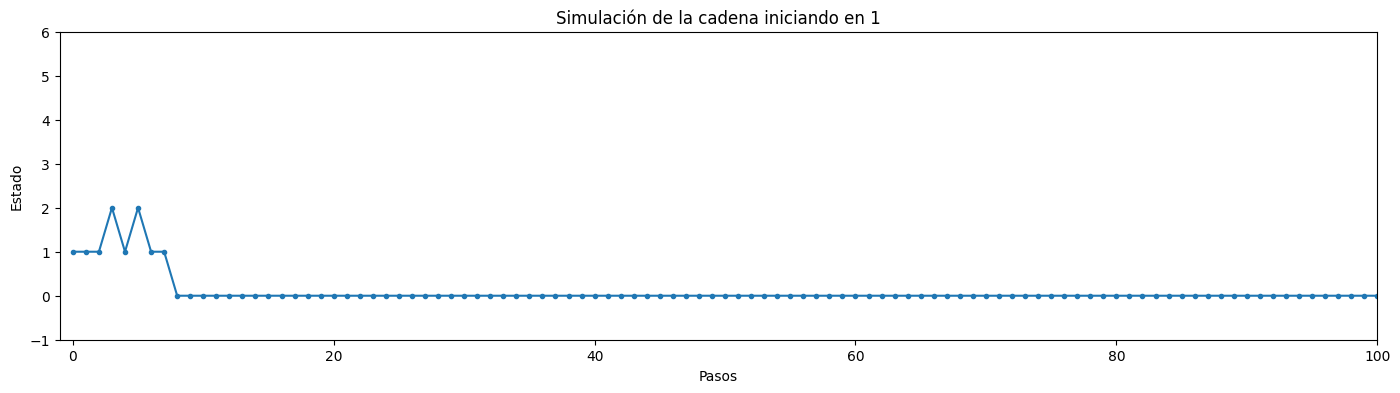

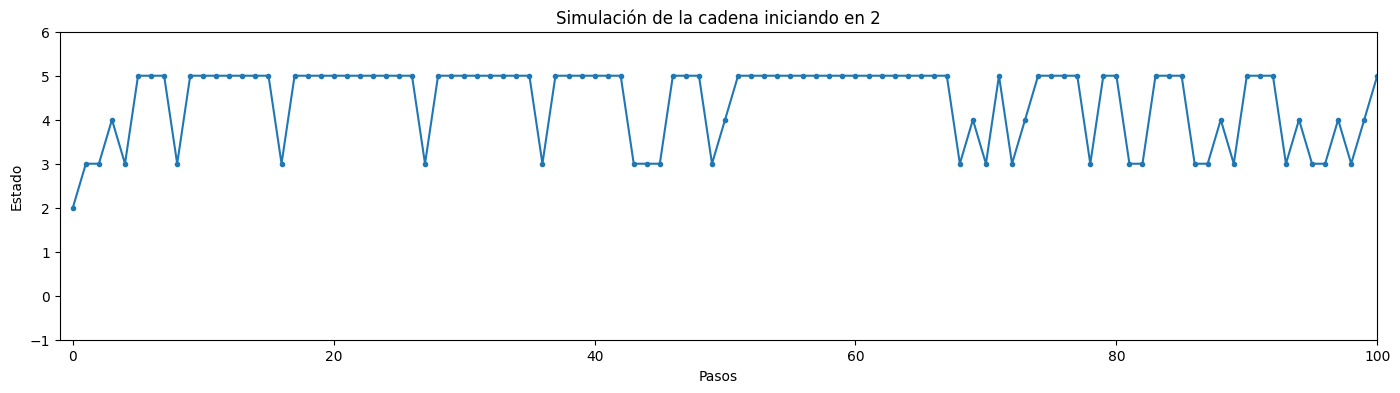

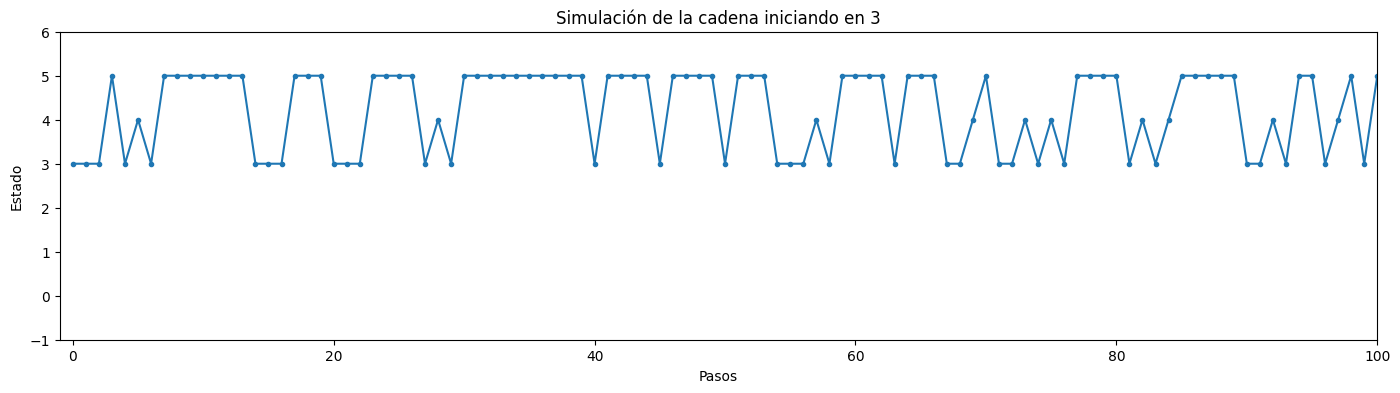

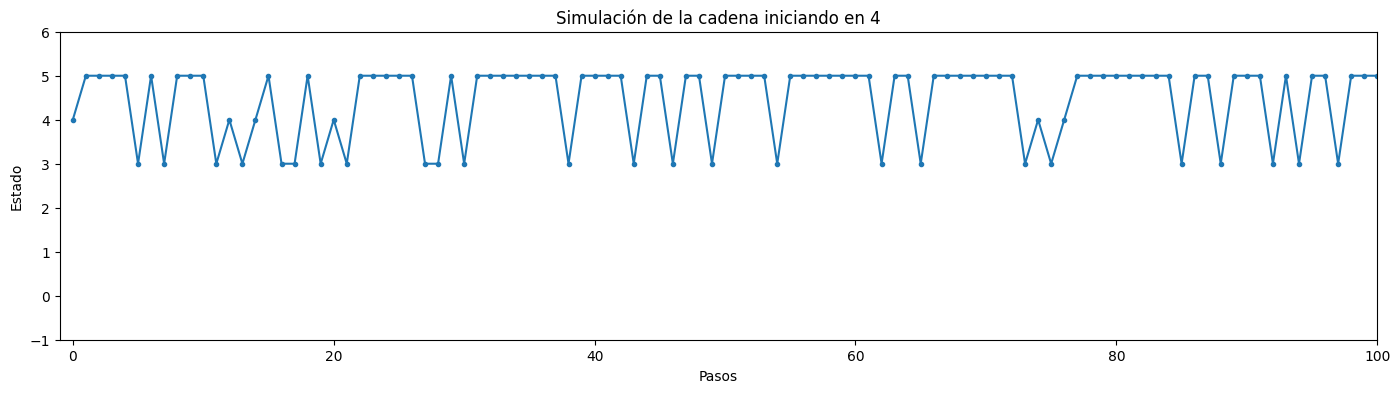

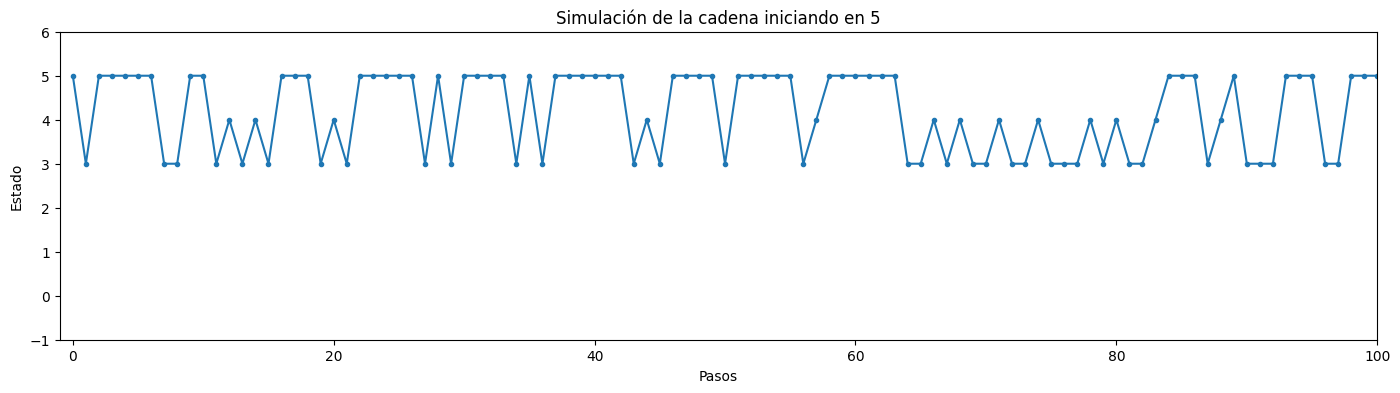

In [51]:
estados = {0,1,2,3,4,5}

# Número de iteraciones
N_iter = 100

for estado in estados:
    # Gráfica de la cadena
    plt.figure(figsize=(17,4))
    plt.plot(chain_simulation(P, estado, n_iter = N_iter).index, chain_simulation(P, estado, N_iter)['estado'], marker = '.' )

    plt.title(f'Simulación de la cadena iniciando en {estado}')
    plt.xlabel('Pasos')
    plt.ylabel('Estado')

    plt.xlim(-1,100)
    plt.ylim(-1,6)
